In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.pyplot import specgram
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter
from mlxtend.plotting import plot_decision_regions
%config InlineBackend.figure_format = 'svg' 

In [12]:
with open('X_trainVal', 'rb') as read_file:
    X_trainVal = pickle.load(read_file)
    
X_trainVal.head()

,mean_centroid,mean_chroma,mean_chroma_cens,mean_chroma_cqt,mean_contrast,mean_flatness,mean_mel,mean_mfccs,mean_rmse,mean_rolloff,...,pctl_50_spec_contrast,pctl_75_spec_contrast,stdev_tonnetz,pctl_25_tonnetz,pctl_50_tonnetz,pctl_75_tonnetz,stdev_zero_cr,pctl_25_zero_cr,pctl_50_zero_cr,pctl_75_zero_cr
7868,483.615217,0.683014,0.284966,0.593849,21.542643,4.510600e-07,0.022260,-13.112588,0.252305,729.653825,...,15.970509,21.105412,0.004596,-0.003062,-0.000486,0.001597,0.008158,0.036377,0.046875,0.049805
29678,501.839433,0.712850,0.286546,0.687643,21.004145,1.653606e-06,0.007800,-14.699813,0.155683,739.554149,...,16.076923,20.201735,0.005442,-0.004589,-0.001226,0.002601,0.004691,0.046631,0.047852,0.049316
25794,505.111119,0.682917,0.282434,0.626459,21.275578,1.123523e-06,0.018425,-13.580114,0.239373,733.118939,...,15.960392,20.843774,0.008478,-0.012815,-0.004437,0.000821,0.005659,0.043701,0.047363,0.050049
10854,497.224107,0.674317,0.285853,0.646665,20.951502,2.683306e-07,0.042089,-10.816415,0.361270,750.692012,...,15.375061,19.923751,0.007818,0.002376,0.003174,0.012728,0.005204,0.044189,0.047363,0.049805
22215,528.920887,0.670942,0.284497,0.640032,21.841417,1.202031e-06,0.055487,-13.404958,0.420591,738.069100,...,16.537685,21.368591,0.015789,-0.019656,-0.008350,0.003261,0.005354,0.048828,0.050293,0.051758


In [13]:
with open('y_trainVal', 'rb') as read_file:
    y_trainVal = pickle.load(read_file)
    
y_trainVal.head()

7868     0
29678    0
25794    1
10854    0
22215    1
Name: label, dtype: int64

# Select X2 subset of features

In [14]:
X_trainVal = X_trainVal[['mean_chroma_cqt','mean_contrast','mean_mfccs','mean_spec_bw','mean_spec_contrast','stdev_centroid','pctl_75_contrast','stdev_mel','stdev_mfccs','pctl_25_mfccs','pctl_50_mfccs','pctl_75_mfccs','stdev_rmse','pctl_25_rmse','pctl_50_rmse','pctl_50_spec_bw','pctl_50_spec_contrast','pctl_75_spec_contrast','stdev_tonnetz','pctl_25_zero_cr']]

In [5]:
X_trainVal.columns

Index(['mean_chroma_cqt', 'mean_contrast', 'mean_mfccs', 'mean_spec_bw',
       'mean_spec_contrast', 'stdev_centroid', 'pctl_75_contrast', 'stdev_mel',
       'stdev_mfccs', 'pctl_25_mfccs', 'pctl_50_mfccs', 'pctl_75_mfccs',
       'stdev_rmse', 'pctl_25_rmse', 'pctl_50_rmse', 'pctl_50_spec_bw',
       'pctl_50_spec_contrast', 'pctl_75_spec_contrast', 'stdev_tonnetz',
       'pctl_25_zero_cr'],
      dtype='object')

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.20, random_state=101,stratify=y_trainVal)

In [6]:
# Over-sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train,y_train)

# Set up pipeline to run models

In [10]:
pipe_lr_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_knn_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=5))])

pipe_rf_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100))])

pipe_svm_ss = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel="linear"))])

pipe_nb_ss = Pipeline([('scl', StandardScaler()),('clf',naive_bayes.GaussianNB())])

pipelines = [pipe_lr_ss, pipe_knn_ss, pipe_rf_ss, pipe_nb_ss, pipe_svm_ss]

for p in pipelines:
    pipe.fit(X_train, y_train)
    prediction_name = (str(pipe) + "_predictions")
    prediction_name = pipe.predict(X_val)
    print(p)
    print(classification_report(y_val,prediction_name))
    print(confusion_matrix(y_val,prediction_name))

/home/kmussar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3676
           1       0.65      0.56      0.60      1124

   micro avg       0.82      0.82      0.82      4800
   macro avg       0.76      0.73      0.74      4800
weighted avg       0.82      0.82      0.82      4800

[[3332  344]
 [ 496  628]]
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3676
           1       0.64      0.61      0.63      1124

   micro avg       0.83      0.83      0.83      4800
   macro avg       0.76      0.75      0.76      4800
weighted avg       0.83      0.83      0.83      4800

[[3288  388]
 [ 435  689]]
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3676
           1       0.71      0.58      0.64      1124

   micro avg       0.85      0.85      0.85      4800
   macro avg       0

# RandomizedSearchCV

In [11]:
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto','sqrt'],
               'max_depth': [10,20,30,40],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap': [True,False]}

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/kmussar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kmussar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kmussar/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Pa

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

**Best parameters**
{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

# XG Boost

In [28]:
xgb_model = XGBClassifier()
param_dist = {"max_depth": [10,30],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(xgb_model, param_grid=param_dist, cv = 2, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.8min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

**Best parameters**

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
# update with best parameters
xgb = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
xgb.fit(X_train,y_train)


In [8]:
sns.set_style("white")
sns.set_context("poster")

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
          ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3676
           1       0.65      0.53      0.58      1124

   micro avg       0.82      0.82      0.82      4800
   macro avg       0.76      0.72      0.73      4800
weighted avg       0.81      0.82      0.82      4800

[[3353  323]
 [ 530  594]]


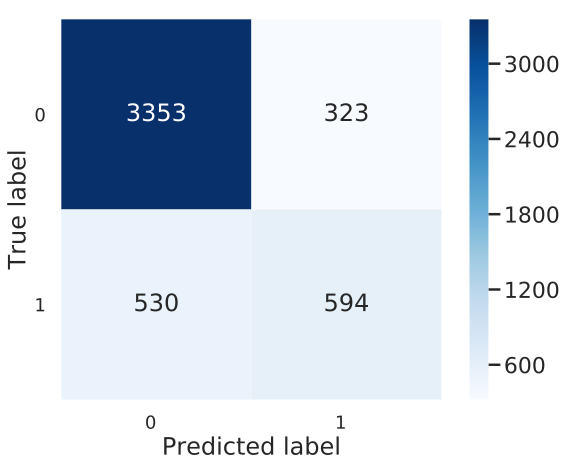

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3676
           1       0.65      0.53      0.58      1124

   micro avg       0.82      0.82      0.82      4800
   macro avg       0.76      0.72      0.73      4800
weighted avg       0.81      0.82      0.82      4800

[[3353  323]
 [ 530  594]]


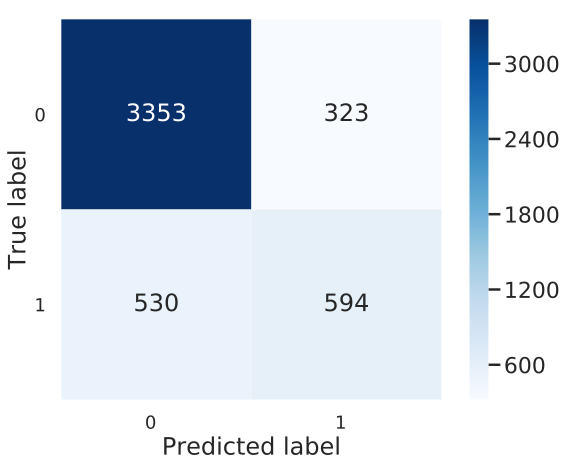

KeyboardInterrupt: 

In [57]:


pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=5))])

pipe_rf_rs = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators= 800,min_samples_split= 2,min_samples_leaf= 4, max_features='auto', max_depth= 30, bootstrap= True))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel="linear"))])

pipe_nb = Pipeline([('scl', StandardScaler()),('clf',naive_bayes.GaussianNB())])

pipe_xgb = Pipeline([('scl', StandardScaler()),('clf',XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=6, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

pipelines = [pipe_rf_rs, pipe_nb, pipe_xgb, pipe_knn, pipe_svm]#pipe_lr


for p in pipelines:
    pipe.fit(X_train, y_train)
    prediction_name = (str(pipe) + "_predictions")
    prediction_name = pipe.predict(X_val)
    print(p)
    print(classification_report(y_val,prediction_name))
    print(confusion_matrix(y_val,prediction_name))
    #print heatmaps 
    cm = confusion_matrix(y_val,prediction_name)
    fig = plt.figure(figsize=(10,7),dpi=300)
    try:
        heatmap = sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.Blues,square=True)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Ensemble Method

In [39]:
# load models from pickles
with open('pipe_lr.pickle', 'rb') as read_file:
    lr_model = pickle.load(read_file)
with open('pipe_rf.pickle', 'rb') as read_file:
    rf_model = pickle.load(read_file)
with open('pipe_nb.pickle', 'rb') as read_file:
    nb_model = pickle.load(read_file)
with open('pipe_xgb.pickle', 'rb') as read_file:
    xgb_model = pickle.load(read_file)

model_names = ["lr_model", "nb_model", "rf_model", "xgb_model"]

#for model_name in model_names:
    #with open(f"models/{model_name}.pickle", "rb") as pfile:
        #exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [40]:
from sklearn.ensemble import VotingClassifier
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

# Get accuracy
y_pred = voting_classifer.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      3676
           1       0.65      0.53      0.58      1124

   micro avg       0.82      0.82      0.82      4800
   macro avg       0.76      0.72      0.73      4800
weighted avg       0.81      0.82      0.82      4800



In [41]:
with open('pipe_ensemble.pickle', 'wb') as to_write:
        pickle.dump(pipe, to_write) 

# Plot ROC Curves

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

#Added to end of pipeline loop - didn't work

 # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_val, pipe.predict_proba(x_val)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_val,pipe.predict(x_val))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (p, auc)) 
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test)[:,1]))

# Naive Bayes

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])
              precision    recall  f1-score   support

           0       0.96      0.61      0.74      3676
           1       0.42      0.93      0.58      1124

   micro avg       0.68      0.68      0.68      4800
   macro avg       0.69      0.77      0.66      4800
weighted avg       0.84      0.68      0.71      4800

[[2230 1446]
 [  83 1041]]


<Figure size 432x288 with 0 Axes>

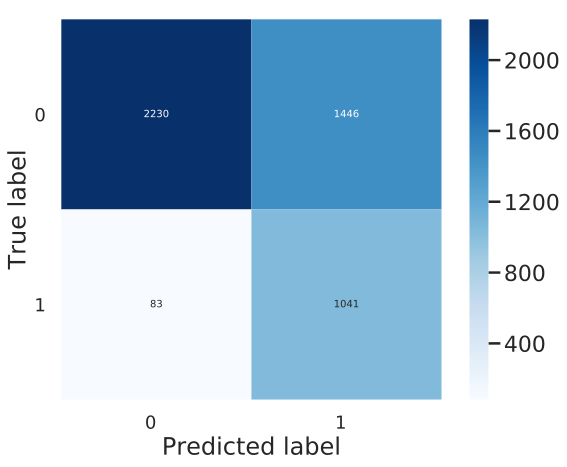

'\n# Compute False postive rate, and True positive rate\nfpr, tpr, thresholds = metrics.roc_curve(y_val, pipe.predict_proba(x_val)[:,1])\n# Calculate Area under the curve to display on the plot\nauc = metrics.roc_auc_score(y_val,pipe.predict(x_val))\n# Now, plot the computed values\nplt.plot(fpr, tpr, label=\'%s ROC (area = %0.2f)\' % (pipe, auc)) \n    \nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'1-Specificity(False Positive Rate)\')\nplt.ylabel(\'Sensitivity(True Positive Rate)\')\nplt.title(\'Receiver Operating Characteristic\')\nplt.legend(loc="lower right")\nplt.show()\n'

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve

pipe = Pipeline([('scl', StandardScaler()),('clf',naive_bayes.GaussianNB())])
pipe.fit(X_train, y_train)
prediction_name = (str(pipe) + "_predictions")
prediction_name = pipe.predict(X_val)
print(pipe)
print(classification_report(y_val,prediction_name))
print(confusion_matrix(y_val,prediction_name))
#print heatmap 
plt.figure()
cm = confusion_matrix(y_val,prediction_name)
fig = plt.figure(figsize=(10,7),dpi=300)
try:
    heatmap = sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.Blues,square=True)
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# TEST DATA

In [17]:
with open('y_test', 'rb') as read_file:
    y_test = pickle.load(read_file)

with open('X_test', 'rb') as read_file:
    X_test = pickle.load(read_file)

In [18]:
X_test = X_test[['mean_chroma_cqt','mean_contrast','mean_mfccs','mean_spec_bw','mean_spec_contrast','stdev_centroid','pctl_75_contrast','stdev_mel','stdev_mfccs','pctl_25_mfccs','pctl_50_mfccs','pctl_75_mfccs','stdev_rmse','pctl_25_rmse','pctl_50_rmse','pctl_50_spec_bw','pctl_50_spec_contrast','pctl_75_spec_contrast','stdev_tonnetz','pctl_25_zero_cr']]

In [15]:
# Over-sampling - trainVal
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_trainVal,y_trainVal)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', GaussianNB(priors=None, var_smoothing=1e-09))])
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      4595
           1       0.42      0.93      0.57      1405

   micro avg       0.68      0.68      0.68      6000
   macro avg       0.69      0.76      0.66      6000
weighted avg       0.84      0.68      0.70      6000

[[2757 1838]
 [ 100 1305]]


<Figure size 432x288 with 0 Axes>

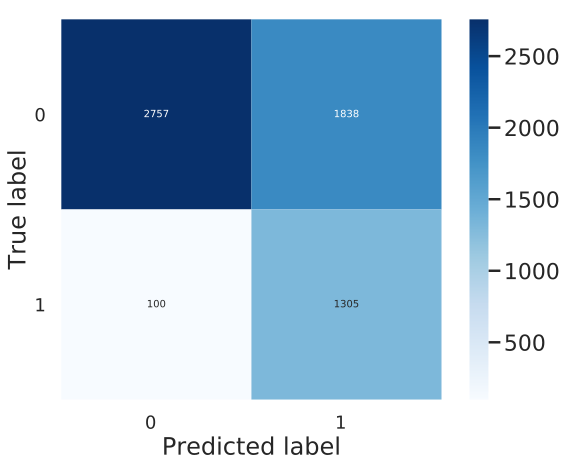

In [19]:
pipe = Pipeline([('scl', StandardScaler()),('clf',naive_bayes.GaussianNB())])
pipe.fit(X_trainVal, y_trainVal)
prediction_name = (str(pipe) + "_predictions")
prediction_name = pipe.predict(X_test)
print(pipe)
print(classification_report(y_test,prediction_name))
print(confusion_matrix(y_test,prediction_name))
#print heatmap 
plt.figure()
cm = confusion_matrix(y_test,prediction_name)
fig = plt.figure(figsize=(10,7),dpi=300)
try:
    heatmap = sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.Blues,square=True)
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=18)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()